In [2]:
import ltspice
import matplotlib.pyplot as plt
import numpy as np
import csv

In [3]:
path = 'Draft1.raw'

In [15]:
l = ltspice.Ltspice(path)
l.parse()
x_data = l.get_data('V(n001)')
y_data = []
gs_data = []
time = l.get_time()
for case in range(l.case_count):
    time = l.get_time(case)
    y_data.append([l.get_data('Id(M1)', case)])
    gs_data.append(l.get_data('V(n002)', case)[0])
    print(gs_data)

[0.6]
[0.6, 0.9]
[0.6, 0.9, 1.2]
[0.6, 0.9, 1.2, 1.5]
[0.6, 0.9, 1.2, 1.5, 1.8]


In [6]:
def unified_model(Vth, k, l = 0, vdsat = 9999):
    # This function constructs the model
    def model(Vds, Vgs):
        Vgt = Vgs - Vth
        Vmin = min((Vds, Vgt, vdsat))
        return 0.5 * k * (Vgt * Vmin - 0.5 * pow(Vmin, 2)) * (1 + l * Vds)
    return model

In [7]:
def plot_model(model, Vgs):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    x_vals = np.arange(start=x_vals[0], stop=x_vals[1], step=0.01)
    y_vals = []
    for x_val in x_vals:
        y_vals.append(model(x_val, Vgs))
    plt.plot(x_vals, y_vals, '--')

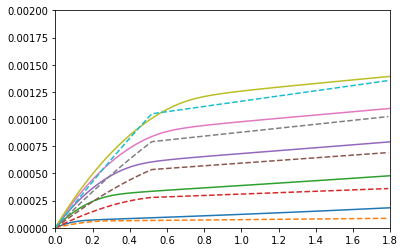

In [55]:
model1 = unified_model(0.3135, 0.002902, 0.26, 0.519)
# model1 = unified_model(0.236, 0.002902, 0.26, 0.55)
plt.ylim(bottom=0., top=0.002)
plt.xlim(left=0., right=1.8)
for idx, data in enumerate(y_data):
    Id = data[0]
    sqrt_id = np.sqrt(Id)
    Vds = x_data
    # plt.plot(Vds, sqrt_id)
    plt.plot(Vds, Id)
    plot_model(model1, gs_data[idx])
plt.savefig('early_comparison.svg')
plt.show()
